In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from multilayer_perceptron import Multilayer_Perceptron

In [2]:
data = pd.read_csv('mnist_test.csv')

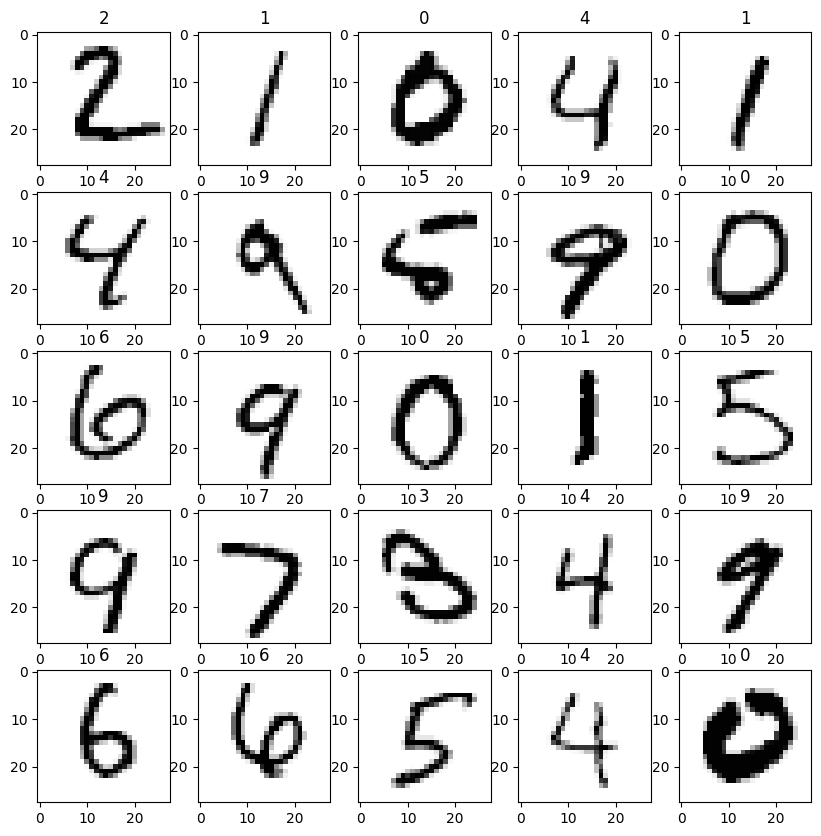

In [3]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))

for plot_index in range(numbers_to_display):
    digit = data[plot_index:plot_index+1].values
    digit_label = digit[0][0]
    digit_pixels = digit[0][1:]
    image_size = int(math.sqrt(digit_pixels.shape[0]))
    frame = digit_pixels.reshape((image_size,image_size))
    plt.subplot(num_cells,num_cells,plot_index+1)
    plt.imshow(frame,cmap='Greys')
    plt.title(digit_label)

plt.show()

In [5]:
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)
train_data = train_data.values
test_data = test_data.values


num_train_examples = 2000

X_train = train_data[:num_train_examples,1:]
y_train = train_data[:num_train_examples,[0]]

X_test = test_data[:,1:]
y_test = test_data[:,[0]]


In [6]:
layers = [784,25,10]

normalize_data = True
max_iters = 300
alpha = 0.1

mp_network = Multilayer_Perceptron(X_train,y_train,layers,normalize_data)
(thetas,costs) = mp_network.train(max_iters,alpha)


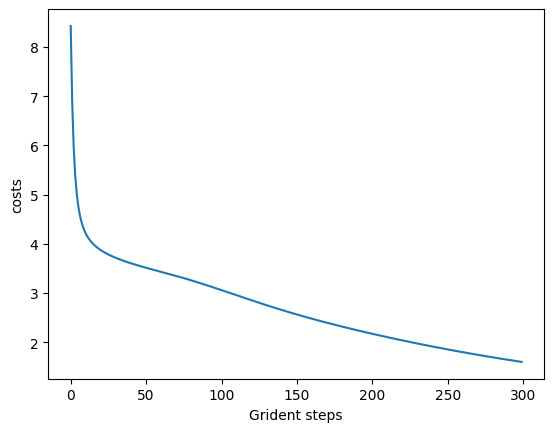

In [7]:
plt.plot(range(len(costs)),costs)
plt.xlabel('Grident steps')
plt.ylabel('costs')
plt.show()

In [11]:
y_train_predictions = mp_network.predict(X_train)
y_test_predictions = mp_network.predict(X_test)

train_p = np.sum(y_train_predictions == y_train)/y_train.shape[0] * 100
test_p = np.sum(y_test_predictions == y_test)/y_test.shape[0] * 100
print ('训练集准确率：',train_p)
print ('测试集准确率：',test_p)


训练集准确率： 84.35000000000001
测试集准确率： 82.15


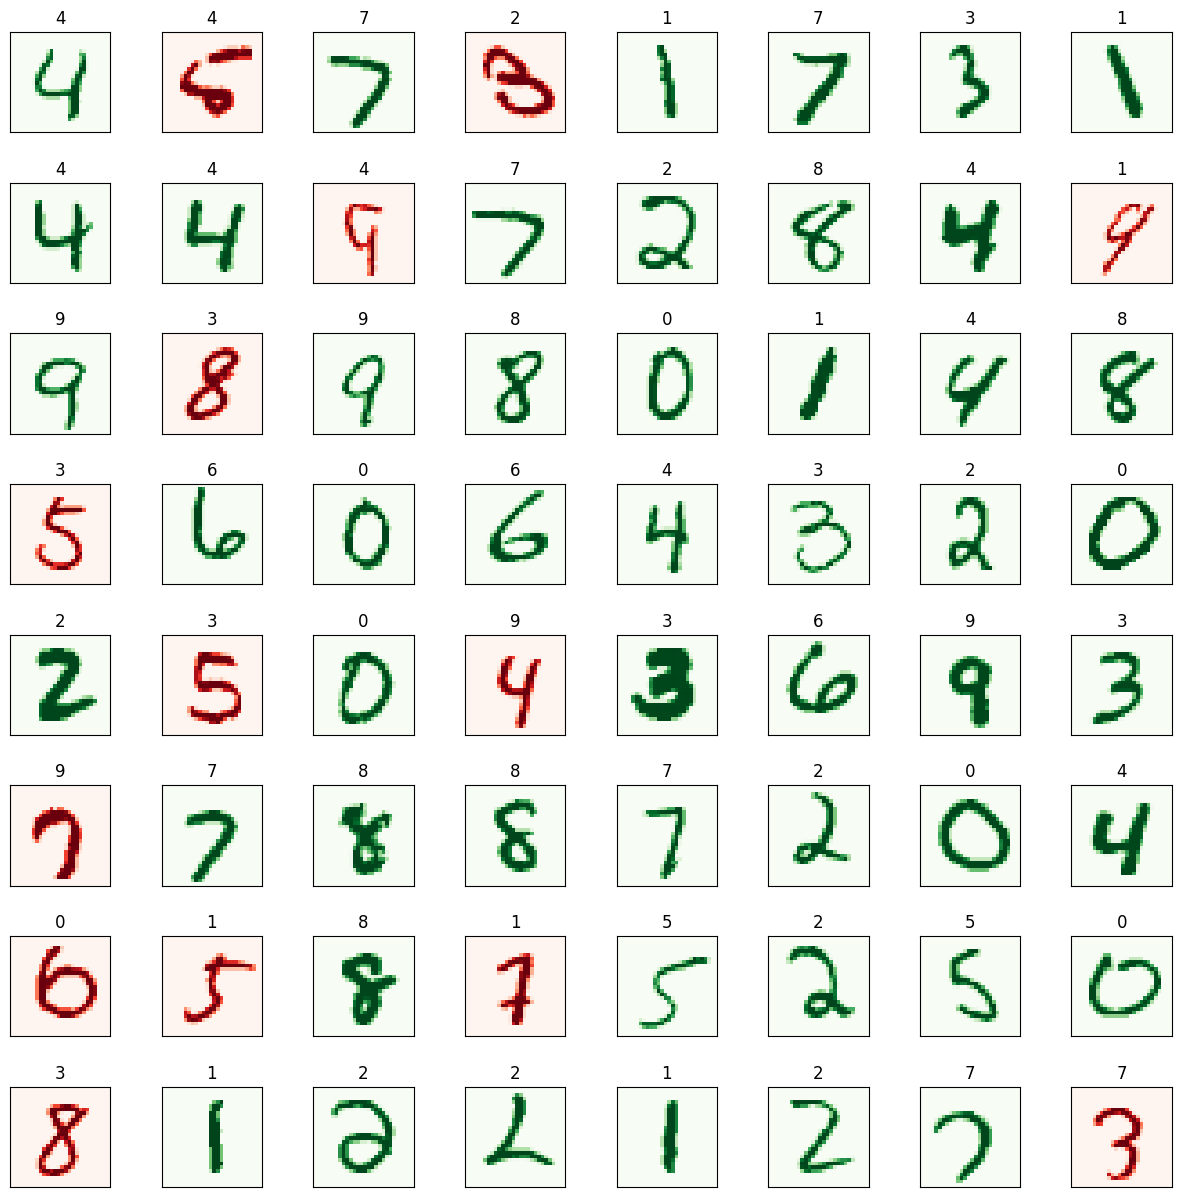

In [12]:
numbers_to_display = 64

num_cells = math.ceil(math.sqrt(numbers_to_display))

plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    digit_label = y_test[plot_index, 0]
    digit_pixels = X_test[plot_index, :]
    
    predicted_label = y_test_predictions[plot_index][0]

    image_size = int(math.sqrt(digit_pixels.shape[0]))
    
    frame = digit_pixels.reshape((image_size, image_size))
    
    color_map = 'Greens' if predicted_label == digit_label else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(frame, cmap=color_map)
    plt.title(predicted_label)
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()


In [1]:
print(1)

1
